<div style="text-align: center; background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
    <h2 style="color: #2c3e50;">Aman Singh</h2>
    <h4 style="color: #34495e;">Class: <span style="color: #e74c3c;">4MSCDS-B</span></h4>
    <h4 style="color: #34495e;">Reg No: <span style="color: #e74c3c;">23122105</span></h4>
</div>


# Project Title
**Sports Player Recognition Using Convolutional Neural Networks (CNNs)**

##  Project Overview
This project aims to develop an automated Sports Player recognition system using **Convolutional Neural Networks (CNNs)** to classify images of well-known personalities. The system leverages image processing techniques, including **Haar wavelet transformations**, to extract features from celebrity images.

###  Key Components

1. **Data Collection**:  
   A dataset containing images of various celebrities was curated, with images organized by celebrity names. Each image underwent preprocessing to ensure uniformity in size and quality.

2. **Feature Extraction**:  
   Images were processed to extract both raw pixel values and Haar wavelet features, combining them into a single input vector for the CNN model.

3. **Model Development**:  
   A CNN model was designed and trained on the processed dataset, optimizing for accuracy in classifying images of different celebrities. The model was validated using a separate test set to ensure its reliability and robustness.

4. **Prediction System**:  
   A prediction function was implemented to classify new images. This function handles image preprocessing, feature extraction, and model inference, returning the predicted celebrity name.

##  Sources
1. **Convolutional Neural Networks (CNNs)** - Various online resources and research papers detailing the architecture and applications of CNNs in image recognition.
2. **OpenCV Documentation** - Official documentation for OpenCV, a library used for image processing tasks in this project.
3. **Haar Cascade Classifiers** - Research papers and tutorials on Haar wavelet transformations and their applications in image processing.
4. **ChatGPT** - Taking the Help of ChatGPT.

In [194]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [195]:
img = cv2.imread('../dataset/Messi/2.jpg')
img.shape

(1009, 768, 3)

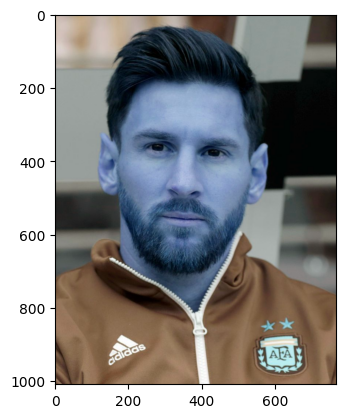

In [196]:
plt.imshow(img)

In [197]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1009, 768)

In [198]:
gray

array([[166, 167, 168, ...,  27,  26,  26],
       [168, 169, 169, ...,  28,  27,  26],
       [171, 171, 172, ...,  29,  28,  28],
       ...,
       [ 69,  73,  76, ...,  85,  86,  87],
       [ 65,  68,  70, ...,  85,  86,  87],
       [ 51,  61,  69, ...,  87,  87,  87]], dtype=uint8)

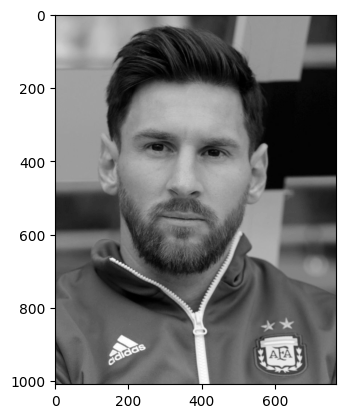

In [199]:
plt.imshow(gray, cmap='gray')

In [200]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[134, 201, 445, 445]], dtype=int32)

In [201]:
(x,y,w,h) = faces[0]
x,y,w,h

(134, 201, 445, 445)

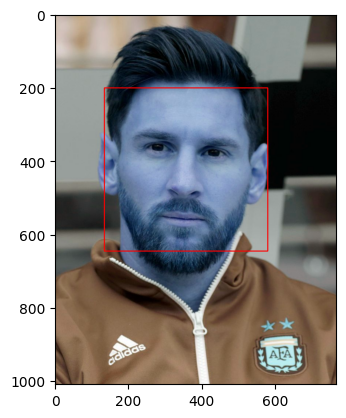

In [202]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

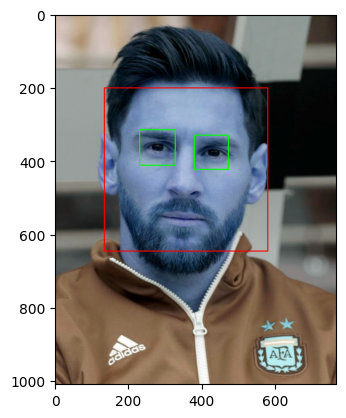

In [203]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

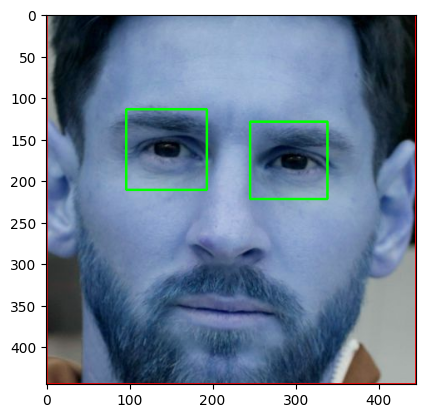

In [204]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [205]:
cropped_img = np.array(roi_color)
cropped_img.shape

(445, 445, 3)

In [206]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

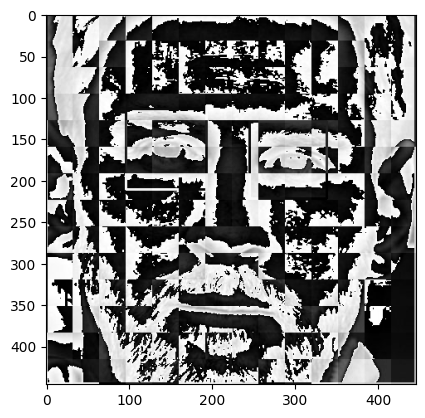

In [207]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [208]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

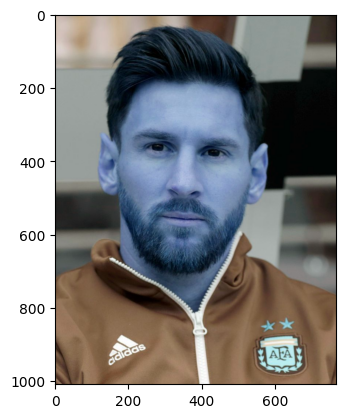

In [209]:
original_image = cv2.imread('../dataset/Messi/2.jpg')
plt.imshow(original_image)

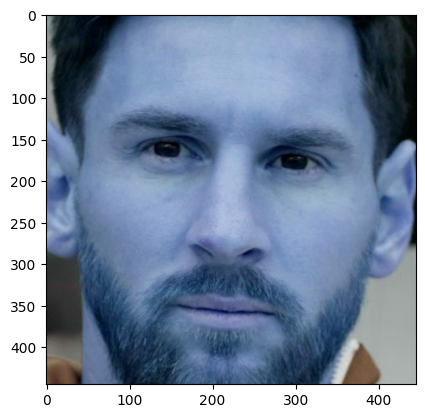

In [210]:
cropped_image = get_cropped_image_if_2_eyes('../dataset/Messi/2.jpg')
plt.imshow(cropped_image)

In [220]:
path_to_data = "../dataset/"
path_to_cr_data = "../dataset/cropped/"

In [221]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [222]:
img_dirs

['../dataset/ViratKohli',
 '../dataset/ronaldo',
 '../dataset/Messi',
 '../dataset/MSDhoni']

In [223]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [225]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}
path_to_cr_data = '../dataset/cropped'  # Adjust this path as needed

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.is_file() and (entry.path.endswith('.jpg') or entry.path.endswith('.png')):  # Check for image files
            # Load the image
            img = cv2.imread(entry.path)
            if img is None:
                print(f"Warning: Could not load image {entry.path}. Skipping.")
                continue  # Skip this image if it can't be loaded

            # Crop the image
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                # Create the directory for cropped images if it doesn't exist
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)

                # Save the cropped image
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1
            else:
                print(f"Warning: No face detected in image {entry.path}. Skipping.")


Generating cropped images in folder:  ../dataset/cropped/ViratKohli
Generating cropped images in folder:  ../dataset/cropped/ronaldo
Generating cropped images in folder:  ../dataset/cropped/Messi
Generating cropped images in folder:  ../dataset/cropped/MSDhoni


In [226]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ViratKohli': ['../dataset/cropped/ViratKohli/ViratKohli16.png',
  '../dataset/cropped/ViratKohli/ViratKohli17.png',
  '../dataset/cropped/ViratKohli/ViratKohli15.png',
  '../dataset/cropped/ViratKohli/ViratKohli14.png',
  '../dataset/cropped/ViratKohli/ViratKohli10.png',
  '../dataset/cropped/ViratKohli/ViratKohli11.png',
  '../dataset/cropped/ViratKohli/ViratKohli13.png',
  '../dataset/cropped/ViratKohli/ViratKohli12.png',
  '../dataset/cropped/ViratKohli/ViratKohli6.png',
  '../dataset/cropped/ViratKohli/ViratKohli7.png',
  '../dataset/cropped/ViratKohli/ViratKohli5.png',
  '../dataset/cropped/ViratKohli/ViratKohli4.png',
  '../dataset/cropped/ViratKohli/ViratKohli1.png',
  '../dataset/cropped/ViratKohli/ViratKohli3.png',
  '../dataset/cropped/ViratKohli/ViratKohli2.png',
  '../dataset/cropped/ViratKohli/ViratKohli9.png',
  '../dataset/cropped/ViratKohli/ViratKohli8.png',
  '../dataset/cropped/ViratKohli/ViratKohli23.png',
  '../dataset/cropped/ViratKohli/ViratKohli22.png',
  '../d

In [227]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ViratKohli': 0, 'ronaldo': 1, 'Messi': 2, 'MSDhoni': 3}

In [228]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [229]:
len(X[0])

4096

In [230]:
X[0]

array([[227],
       [225],
       [225],
       ...,
       [  2],
       [215],
       [ 17]], dtype=uint8)

In [231]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(88, 4096)

In [232]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

# Assuming your data is already in X (shape: 98, 4096) and y
# Normalize the input data
X = X / 255.0

# One-hot encode the labels
y = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a fully connected neural network model
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(1024, activation='relu', input_shape=(4096,), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Hidden layers with L2 regularization and Dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# Output layer (number of classes equals y_train.shape[1])
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model using Adam optimizer and categorical crossentropy loss
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to avoid overfitting and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# # Save the model for future use
model.save('celebrity_recognition_model.h5')


Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2572 - loss: 5.8883 - val_accuracy: 0.5000 - val_loss: 3.9055 - learning_rate: 0.0010
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2788 - loss: 7.4986 - val_accuracy: 0.2222 - val_loss: 5.2656 - learning_rate: 0.0010
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2511 - loss: 6.7944 - val_accuracy: 0.3333 - val_loss: 4.0440 - learning_rate: 0.0010
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1925 - loss: 6.8145 - val_accuracy: 0.1111 - val_loss: 4.7229 - learning_rate: 0.0010
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4363 - loss: 6.0488 - val_accuracy: 0.1667 - val_loss: 3.9040 - learning_rate: 0.0010
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2849 - loss: 6.3900 - val_accuracy: 0.1667 - val_loss: 3.7794 - learning_rate: 0.0010
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4021 - loss: 4.7910 - val_accuracy: 

Test accuracy: 0.7222222089767456


In [233]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,557,454 (55.53 MB)

 Trainable params: 4,852,484 (18.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,704,970 (37.02 MB)

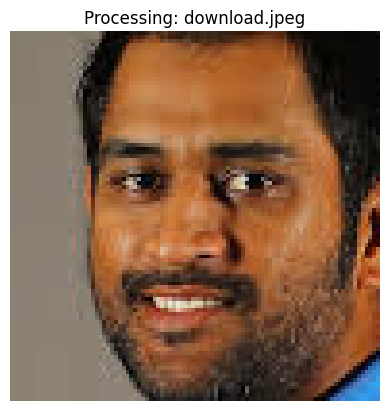

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted celebrity for download.jpeg: MSDhoni



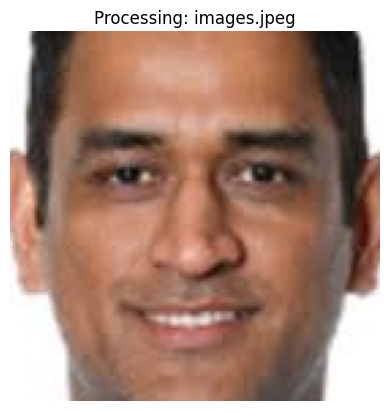

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted celebrity for images.jpeg: MSDhoni

Error: Could not detect both eyes or crop the image for download (1).jpeg.


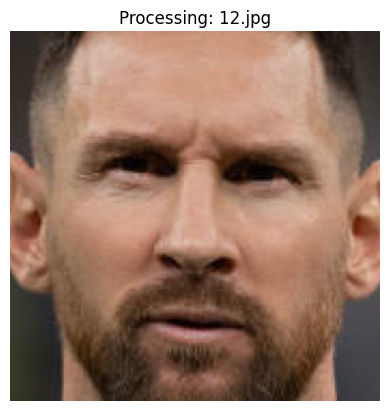

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted celebrity for 12.jpg: Messi



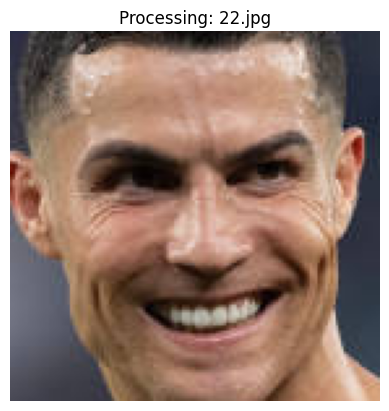

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted celebrity for 22.jpg: ronaldo



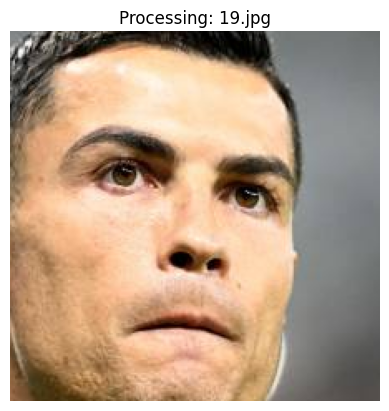

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted celebrity for 19.jpg: ronaldo



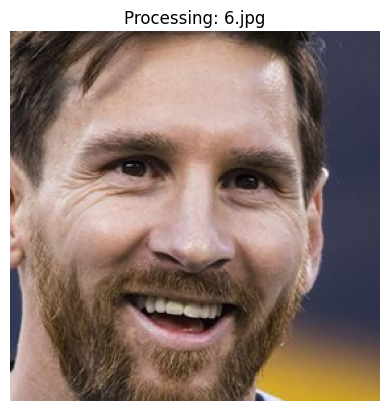

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted celebrity for 6.jpg: Messi



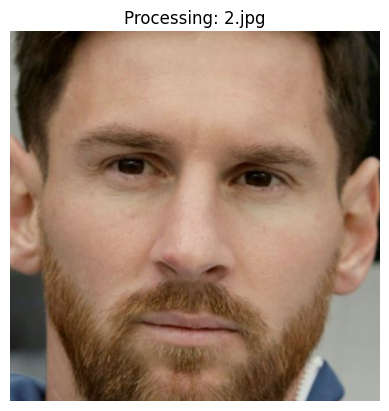

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted celebrity for 2.jpg: Messi

Class Dictionary: {'ViratKohli': 0, 'ronaldo': 1, 'Messi': 2, 'MSDhoni': 3}


In [243]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('celebrity_recognition_model.h5')  # Update the model path as needed

# Class dictionary mapping indices to celebrity names
class_dict = {'ViratKohli': 0, 'ronaldo': 1, 'Messi': 2, 'MSDhoni': 3}

# Function to preprocess and combine raw and haar wavelet features
def preprocess_image(img):
    # Resize the image to the expected input size
    scalled_raw_img = cv2.resize(img, (32, 32))
    
    # Apply Haar wavelet transformation (assuming w2d is defined elsewhere)
    img_har = w2d(img, 'db1', 5)  # Make sure this function is implemented
    scalled_img_har = cv2.resize(img_har, (32, 32))
    
    # Combine raw image and haar features into a single input vector
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
    
    # Flatten the combined image and normalize
    combined_img = combined_img.reshape(1, 4096).astype(float)
    combined_img = combined_img / 255.0  # Normalize
    return combined_img

# Path to the test dataset folder
test_dataset_path = '../test-data/'  # Replace with your test dataset path

# Iterate through all images in the test dataset folder
for filename in os.listdir(test_dataset_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):  # Check for image file types
        img_path = os.path.join(test_dataset_path, filename)

        # Load the image
        img = cv2.imread(img_path)

        # Assuming get_cropped_image_if_2_eyes returns the cropped image array, not a file path
        cropped_image = get_cropped_image_if_2_eyes(img_path)

        # Check if cropping was successful (cropped_image should not be None)
        if cropped_image is None:
            print(f"Error: Could not detect both eyes or crop the image for {filename}.")
        else:
            # Display the cropped image
            plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')  # Turn off axis labels
            plt.title(f'Processing: {filename}')  # Title with the image filename
            plt.show()

            # Preprocess the image for the model prediction
            preprocessed_img = preprocess_image(cropped_image)

            # Predict the celebrity in the image
            prediction = model.predict(preprocessed_img)

            # Get the predicted class index
            predicted_class_index = np.argmax(prediction)

            # Get the predicted celebrity name
            predicted_celebrity = list(class_dict.keys())[list(class_dict.values()).index(predicted_class_index)]
            print(f'Predicted celebrity for {filename}: {predicted_celebrity}\n')

# Optionally, print the class dictionary at the end
print("Class Dictionary:", class_dict)


In [66]:
# Save the model using TensorFlow/Keras' save method
model.save('celebrity_model.h5')